# Corporate Prosecution - Exercise B

#### Summary

Looking at corporate prosecutions over time, and the possible assignment of a compliance officer.

#### Files

- cpr-data.xls, "detailed information about every federal organizational prosecution since 2001, as well as deferred and non-prosecution agreements with organizations since 1990"

#### Data Source(s)

The UVA School of Law publishees a [Corpoate Prosecution Registry](http://lib.law.virginia.edu/Garrett/corporate-prosecution-registry/about.html) 

> The goal of this Corporate Prosecutions Registry is to provide comprehensive and up-to-date information on federal organizational prosecutions in the United States, so that we can better understand how corporate prosecutions are brought and resolved. We include detailed information about every federal organizational prosecution since 2001, as well as deferred and non-prosecution agreements with organizations since 1990.

[Corpoate Prosecution Registry](http://lib.law.virginia.edu/Garrett/corporate-prosecution-registry/about.html) 

#### Skills

- Working with CSV files
- Counting and summarizing columns
- Searching with strings
- Extracting with strings

# Read in `cpr-data.csv`

In [168]:
import pandas as pd 

df = pd.read_csv("cpr-data.csv")
df.head()

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,8,2003-06-17,2003-06-17,2003-02-28,NaN,No,nan,nan,0.00,"272,734.00",12.00,nan,272734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,003.00",PACER,NaN
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,7,2005-01-25,2005-01-25,2004-09-30,NaN,No,nan,nan,"24,000.00",nan,36.00,nan,24000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005.00",PACER,NaN
2,2529,"3rd & Bell, LLC",plea,Immigration,NaN,Arizona,United States,No,USA v. Danny's Management Services LLC et al,2:13-cr-01143,510,2014-11-21,2014-11-21,2014-11-20,NaN,No,0.00,0.00,50.00,0.00,0.00,0.00,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,014.00",PACER,NaN
3,822,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. 41 Market Inc.,4:06-cr-00023,11,2006-07-05,2006-07-05,2006-03-16,NaN,No,nan,nan,"14,640.00",nan,36.00,nan,14640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,006.00",PACER,NaN
4,140,"45,000, Inc.",plea,Environmental,NaN,Louisiana - Middle District,United States,No,USA v. 45000 Inc,3:04-cr-00180,17,2005-06-03,2005-06-03,2004-11-22,NaN,No,nan,nan,"25,000.00",nan,0.00,"2,500.00",27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005.00",PACER,NaN


### Check that your dataframe has 3038 rows and 56 columns.

In [169]:
df.shape

(3038, 56)

### List the columns and their data types

In [170]:
df.dtypes

REC_ID                                                                      int64
COMPANY                                                                    object
DISPOSITION_TYPE                                                           object
PRIMARY_CRIME_CODE                                                         object
SWISS_BANK_PROGRAM                                                         object
USAO                                                                       object
COUNTRY                                                                    object
FINANCIAL_INSTITUTION                                                      object
CASE_NAME                                                                  object
CASE_ID                                                                    object
DOCKET_NO                                                                  object
DATE                                                                       object
JUDGMENT_DATE   

### What do the following columns mean?

- PRIMARY_CRIME_CODE
- DISPOSITION_TYPE
- AGREEMENT_TYPE
- COUNTRY
- FINE
- TOTAL_PAYMENT
- USAO
- PROBATION_LENGTH
- AGREEMENT_REQUIRED_NEW_POSITIONS
- INDEP_MONITOR_REQUIRED

In [171]:
# According to data-dictionary.txt

# PRIMARY_CRIME_CODE - This can include any one of the following:
# 	Accounting Fraud - federal crimes relating to false statements or entries, such as under 18 U.S.C. § 1001 (a)(3).
# 	Antitrust - prosecutions brought under the Sherman Antitrust Act's criminal provisions.
# 	APPS - violations of the Act to Prevent Pollution from Ships (APPS), 33 U.S.C. §§ 1905-1915.
# 	Bank Secrecy Act - prosecutors brought under the Bank Secrecy Act, including 18 U.S.C. § 5331-5332 regarding failure to file reports of financial transactions or lack of adequate controls to prevent money laundering
# 	Bribery - violations of federal bribery and gratuities statutes such as 18 U.S.C. § 201.
# 	Bribery - violations of federal bribery and gratuities statutes such as 18 U.S.C. § 201.
# 	Controlled Substances - these include violations of the Controlled Substances Act (CSA).
# 	Environmental - these include prosecutions brought under any of the range of federal environmental statutes, including the Act to Prevent Pollution from Ships, the Clean Air Act, the Clear Water Act, the Resource Conversation and Recovery Act, and statutes regulating marine pollution, handling of hazardous waste, and others.
# 	FCPA (Foreign Corrupt Practices Act) - these include criminal prosecutions brought under the FCPA's bribery provisions and willful violations of the internal controls and books and records provisions, 15 U.S.C. §§ 78dd-1, et seq. A useful federal resource guide explaining these provisions is available here.
# 	False Statements - these include prosecutions for making false statements to federal authorities under statutes including 18 U.S.C. § 1001.
# 	Firearms - violations of federal criminal firearms registration and sales statutes.
# 	Food - criminal violations of federal food safety laws including for adulterating or misbranding under the Federal Food, Drug, and Cosmetic Act (FDCA).
# 	Fraud - these include mail fraud and wire fraud prosecutions brought under 18 U.S.C. § 1341 and 1343, as well as other fraud crimes, such as conspiracy to defraud the federal government, 18 U.S.C. §371. However, health care fraud, securities fraud, and tax fraud cases are listed separately.
# 	Gambling - illegal gambling business under 18 U.S. Code § 1955 or violations of other federal gambling laws.
# 	Health Care Fraud - these include prosecutions brought under 18 U.S.C. § 1347.
# 	Immigration - these include prosecutions brought for violating immigration rules concerning employment of noncitizens and unlawful employment practices under 8 U.S.C. §1324a and b, as well as crimes concerning bringing in and harboring illegal aliens under 8 U.S.C. §1324.
# 	Import / Export - these include violations of U.S. customs regulations concerning imports and exports as well as violations of U.S. sanctions regarding international trade and financial transactions, including violations of the International Emergency Economic Powers Act (IEEPA).
# 	Kickbacks - violation of the federal anti-kickback statutes, including 42 U.S. Code § 1320a-7b.
# 	Money Laundering - these include prosecutions brought under 18 U.S.C.§1956-1957 and under 18 U.S.C. §5324 regarding structuring transactions to evade reporting requirements.
# 	Obstruction of Justice - these include prosecutions brought under 18 U.S.C. § 1503 and companion statutes.
# 	OSHA - workplace safety crimes, involving the willful violation of a worker safety standard in the Occupational Safety and Health Act, as well as other workplace safety statutes such as and the Federal Mine Safety and Health Act.
# 	Other - additional federal crimes, of which there are many, that do not fall within the categories described here.
# 	Pharmaceutical - these include prosecutions brought under the Federal Food, Drug, and Cosmetic Act (FDCA) as well as anti-kickback and other related claims involving pharmaceutical sales and branding.
# 	Securities Fraud - these include prosecutions brought under 18 U.S.C. § 1348.
# 	Tax Fraud - these include prosecutions brought under 26 U.S.C. § 7201 and 7201 regarding attempted federal tax evasion and fraud and false statements to tax authorities.
# 	Wildlife - prosecutions under wildlife conversation laws including under Endangered Species Act and the Lacey Act.
# DISPOSITION_TYPE - Indicates whether the prosecution was resolved through a type of agreement: a plea ("plea"); non-prosecution agreement ("NP"); or deferred prosecution agreement ("DP"); or whether the prosecution was resolved at trial in a conviction ("trial conviction") or acquittal ("acquittal") or a dismissal before or during trial ("dismissal"); as well as by a declination in which the case was dismissed by the prosecutor ("declination").
# AGREEMENT_TYPE - Indicates whether the agreement is a plea ("plea"), non-prosecution agreement ("NP"), or deferred prosecution agreement ("DP")
# COUNTRY - Country in which the entity was incorporated.
# FINE - Amount of fine in U.S. dollars.
# TOTAL_PAYMENT - Sum of all monetary penalties (i.e. fines, restitution, forfeiture, disgorgements, community service, etc.)
# USAO - U.S. Attorney's Offices involved in the prosecution. Multiple entries are separated by a "|".
# PROBATION_LENGTH - Length of probation in months.
# AGREEMENT_REQUIRED_NEW_POSITIONS - the agreement stated that new positions be created at a firm, typically related to compliance
# INDEP_MONITOR_REQUIRED - does the agreement require that an independent actor be retained to supervise implementation of a compliance program


# Customizing the display in pandas

See how the middle of the table has a `...`? Let's fix that.

## How do you see the number of columns pandas will display?

In [172]:
pd.options.display.max_columns

65

## Set pandas to display 65 columns

In [173]:
pd.set_option('display.max_columns', 65)

## How do you see the number of rows pandas will display? Then, set it to display 100 rows at a time.

What does "the number rows pandas will display" actually mean?

In [174]:
pd.options.display.max_rows

100

In [175]:
pd.set_option('display.max_rows', 100)

## Describe the TOTAL_PAYMENT column to me numerically - maxes, mins, averages.

Do this in **one line.**

In [176]:
df['TOTAL_PAYMENT'].describe()

count           3,038.00
mean       22,842,732.11
std       155,697,740.02
min                 0.00
25%            21,892.00
50%           200,000.00
75%         2,100,000.00
max     4,486,800,000.00
Name: TOTAL_PAYMENT, dtype: float64

### Oh that's ugly ugly ugly. Set pandas to format floats with 2 decimal points, we probably don't need to be more specific than that. Oh, and tell it to use a `,` in the thousands position!

I'm just going to leave [this here](http://infohost.nmt.edu/~shipman/doc/python27/web/new-str-format.html) for reference. You should definitely come up and ask on the board, though.

In [177]:
#df['TOTAL_PAYMENT'] = pd.Series(["{:,.2f}".format(val) for val in df['TOTAL_PAYMENT']], index = df.index)
pd.options.display.float_format = '{:,.2f}'.format

## Look at the fine and the forfeiture disgorgement for the first two rows. Pretty nice!

In [178]:
df[['FINE', 'FORFEITURE_DISGORGEMENT']].head(2)

,FINE,FORFEITURE_DISGORGEMENT
0,0.00,"272,734.00"
1,"24,000.00",nan


# A little summarizing

## How many of cases actually went to trial? How did most of these cases arrive at a decision?

In [270]:
# DISPOSITION_TYPE
# Indicates whether the prosecution was resolved through a type of agreement: 
#   a plea ("plea"); 
#   non-prosecution agreement ("NP");
#   or deferred prosecution agreement ("DP");
# or whether the prosecution was resolved:
#   at trial in a conviction ("trial conviction")
#   or acquittal ("acquittal")
#   or a dismissal before
#   or during trial ("dismissal");
#   as well as by a declination in which the case was dismissed by the
#   prosecutor ("declination").

# disposition_types = [
#     'trial convicton', # the convict(i)on is missing in the data
#     'acquittal',
#     'dismissal',
#     'declination'
# ]

# len(df[df['DISPOSITION_TYPE'].isin(disposition_types)])

len(df[df['JUDGMENT_DATE'].notnull()])

2532

In [271]:
df[df['JUDGMENT_DATE'].notnull()]['DISPOSITION_TYPE'].value_counts()

plea               2529
trial convicton       2
NP                    1
Name: DISPOSITION_TYPE, dtype: int64

### Graph the previous answer, with the longest bar on top

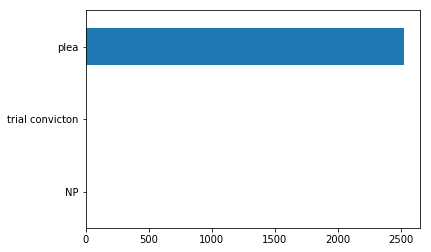

In [283]:
(df[df['JUDGMENT_DATE'].notnull()]['DISPOSITION_TYPE']
 .value_counts()
 .plot(kind='barh')
 .invert_yaxis())

## What's the distribution of total payments look like?

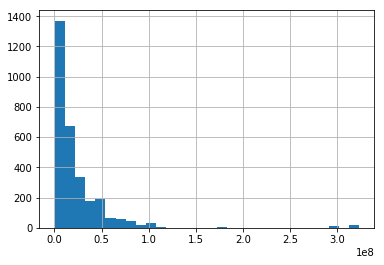

In [232]:
%matplotlib inline
# This one doesn't show much
#df['TOTAL_PAYMENT'].hist()

# Average every 50 payments
df['TOTAL_PAYMENT'].rolling(30).mean().hist(bins=30)

## Sort by total payments, descending

In [183]:
#df['TOTAL_PAYMENT'].plot(kind='barh')

# Column selection

We wanted to view all of those rows, but honestly that's a little silly. **We can't actually see the data we want!** Let's just select the ones we care about.

## Create a new dataframe that only includes the company name, disposition type, total payment, and date.

In [184]:
df_refined = df[['COMPANY', 'DISPOSITION_TYPE', 'TOTAL_PAYMENT', 'DATE']]
df_refined.reset_index()

,index,COMPANY,DISPOSITION_TYPE,TOTAL_PAYMENT,DATE
0,0,"1st Union Transfer and Telegraph, Inc.",plea,272734,2003-06-17
1,1,"3D Poultry Loading, Inc.",plea,24000,2005-01-25
2,2,"3rd & Bell, LLC",plea,50,2014-11-21
3,3,41 Market Inc.,plea,14640,2006-07-05
4,4,"45,000, Inc.",plea,27500,2005-06-03
5,5,4628 Group Inc.,plea,500000,2001-07-31
6,6,"70 North, LLC",plea,2000,2013-03-05
7,7,806 Trading Corp.,plea,42000,2012-03-05
8,8,"83rd & Union Hills, LLC",plea,50,2014-11-24
9,9,"84th & Bell, LLC",plea,50,2014-11-24


## Confirm it has 3038 rows and 5 columns

In [185]:
df_refined.shape

(3038, 4)

## Using this subset, extract the year into a separate column called `year`

Your machine will complain. **Let's talk about that error.**

In [186]:
df_refined['year'] = df_refined.DATE.str.extract('^([0-9]{4})')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Make the 'year' column an integer.

Or at least *try*, then turn it into a float. Why did one work but the other didn't?

In [187]:
df_refined['year'] = df_refined['year'].astype(float)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Make a histogram of cases over the years

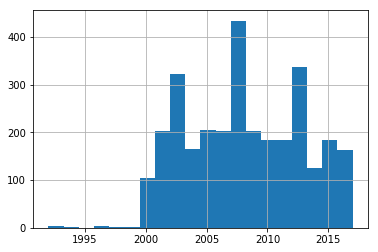

In [234]:
df_refined['year'].hist(bins=20)

## What was the total amount paid across all cases each year?

In [248]:
df_refined.groupby('year')['TOTAL_PAYMENT'].sum().apply(lambda x: x / 1).sort_index(ascending=False)

year
2,017.00   6,866,002,335.00
2,016.00   3,808,529,923.00
2,015.00   9,844,845,643.00
2,014.00   7,062,535,053.00
2,013.00   7,724,920,476.00
2,012.00   6,696,816,915.00
2,011.00   2,957,950,912.00
2,010.00   4,745,389,066.00
2,009.00   4,090,513,821.00
2,008.00   2,729,966,187.00
2,007.00   3,034,830,498.00
2,006.00   1,201,775,794.00
2,005.00   4,210,235,461.00
2,004.00   1,637,537,063.00
2,003.00     911,162,220.00
2,002.00     829,424,749.00
2,001.00     761,777,886.00
2,000.00     278,206,161.00
1,999.00               0.00
1,998.00               0.00
1,996.00               0.00
1,994.00               0.00
1,993.00               0.00
1,992.00               0.00
Name: TOTAL_PAYMENT, dtype: float64

## Graph it!

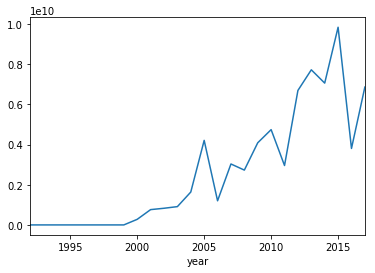

In [253]:
df_refined.groupby('year')['TOTAL_PAYMENT'].sum().plot()

# Cleaning up a column

Take a look at **AGREEMENT_REQUIRED_NEW_POSITIONS** in your **ORIGINAL DATAFRAME**. How many times does it have a value in it?

- Tip: There are a few ways to do this. Maybe you want to ask for an easy one!

In [192]:
# Return Series with number of non-NA/null observations over requested axis
df['AGREEMENT_REQUIRED_NEW_POSITIONS'].count()

261

### What are the top 5 responses for `AGREEMENT_REQUIRED_NEW_POSITIONS`?

In [193]:
df['AGREEMENT_REQUIRED_NEW_POSITIONS'].value_counts().head(5)

No                                                                                       163
Yes; Assignment one or more senior officers to compliance, with reporting obligations     46
Yes; Compliance Officer                                                                    6
Yes; Chief Compliance Officer                                                              6
Yes; Compliance officer                                                                    3
Name: AGREEMENT_REQUIRED_NEW_POSITIONS, dtype: int64

## That looks messy.

### HOLD ON, time to learn something

**There are a few ways to do the next question**, but a couple popular methods will have pandas yell at you. You might want to try this new thing called `loc`! **It is used to update a column in a row based on a condition.**

```
df.loc[df.country == 'Angola', "continent"] = "Africa"
```

This updates the `continent` column to be `Africa` for every row where `df.country == 'Angola'`. You CANNOT do the following, which is probably what you've wanted to do:

```
df[df.country == 'Angola']['continent'] = 'Africa'
```

And now you know.

## Start to this up by creating a new column called `required_new_position`.

This column should be `True` if a new position was required, `False` if a new position was not required, and `NaN` if it's unknown.

- Tip: You should use `.str.contains`
- Tip: Do you know how to say "at the start of a line" using regex?
- Tip: We've talked about how to avoid `cannot index with vector containing NA / NaN values` but if you get it feel free to write it on the board

In [194]:
import numpy as np
df_refined["required_new_position"] = np.nan

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [195]:
len(df[df.AGREEMENT_REQUIRED_NEW_POSITIONS.str.contains('Yes', na=False)])

98

In [196]:
df_refined.loc[df.AGREEMENT_REQUIRED_NEW_POSITIONS.str.contains('Yes', na=False), "required_new_position"] = True
df_refined.loc[df.AGREEMENT_REQUIRED_NEW_POSITIONS.str.contains('No', na=False), "required_new_position"] = False

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [197]:
df_refined

,COMPANY,DISPOSITION_TYPE,TOTAL_PAYMENT,DATE,year,required_new_position
0,"1st Union Transfer and Telegraph, Inc.",plea,272734,2003-06-17,"2,003.00",NaN
1,"3D Poultry Loading, Inc.",plea,24000,2005-01-25,"2,005.00",NaN
2,"3rd & Bell, LLC",plea,50,2014-11-21,"2,014.00",NaN
3,41 Market Inc.,plea,14640,2006-07-05,"2,006.00",NaN
4,"45,000, Inc.",plea,27500,2005-06-03,"2,005.00",NaN
5,4628 Group Inc.,plea,500000,2001-07-31,"2,001.00",NaN
6,"70 North, LLC",plea,2000,2013-03-05,"2,013.00",NaN
7,806 Trading Corp.,plea,42000,2012-03-05,"2,012.00",NaN
8,"83rd & Union Hills, LLC",plea,50,2014-11-24,"2,014.00",NaN
9,"84th & Bell, LLC",plea,50,2014-11-24,"2,014.00",NaN


### Confirm that your new column has 163 `True` values and 98 `False` values

In [198]:
df_refined['required_new_position'].value_counts()

False    165
True      96
Name: required_new_position, dtype: int64

## Extract the position name into a new column called `new_position`

In [199]:
df_refined['new_position'] = df['AGREEMENT_REQUIRED_NEW_POSITIONS'].str.extract(';(.*)$')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Make sure you extracted correctly

The line below should show at least SIX rows. If it doesn't show any rows, something went wrong!

- Tip: A `.value_counts()` might look okay, even though something is a little off.

In [200]:
df_refined[df_refined.new_position == " Compliance Officer"]

,COMPANY,DISPOSITION_TYPE,TOTAL_PAYMENT,DATE,year,required_new_position,new_position
441,Boeing Co.,NP,50000000,2006-06-01,"2,006.00",True,Compliance Officer
664,"Columbia Farms, Inc.",DP,1500000,2009-11-03,"2,009.00",True,Compliance Officer
1063,Fisher Sand & Gravel / General Steel (subsid.)...,DP,1168141,2009-04-29,"2,009.00",True,Compliance Officer
1657,Louis Berger Group,DP,18700000,2010-11-05,"2,010.00",True,Compliance Officer
1661,"Love Irrigation, Inc.",DP,515110,2012-05-22,"2,012.00",True,Compliance Officer
3005,"Wright Medical Technology, Inc.",DP,0,2010-10-01,"2,010.00",True,Compliance Officer


## Find all cases that required a compliance officer

That one above only gives us six. We want more! **Find at least 23 cases that required the creation of a compliance officer.**

- Tip: Regular expressions might be your friend here
- Tip: If you get an error about **new_position** not being found, change your code from when you created the column from `df.new_position = ...` to `df['new_position'] = ...`

In [201]:
df_refined[df_refined.new_position.str.contains("Compliance Officer", na=False)]

,COMPANY,DISPOSITION_TYPE,TOTAL_PAYMENT,DATE,year,required_new_position,new_position
276,"Atrium Companies, Inc.",NP,2000000,2012-01-01,"2,012.00",True,Chief Compliance Officer
362,"Bashas, Inc.",NP,1472487,2013-08-30,"2,013.00",True,Chief Compliance Officer
415,Biomet Inc.,DP,17800000,2012-03-26,"2,012.00",True,"Expanded compliance department, compliance of..."
441,Boeing Co.,NP,50000000,2006-06-01,"2,006.00",True,Compliance Officer
664,"Columbia Farms, Inc.",DP,1500000,2009-11-03,"2,009.00",True,Compliance Officer
682,Computer Associates,DP,225000000,2004-09-01,"2,004.00",True,"Two new independent directors to Board, estab..."
732,Cosmetics Laboratories of America,NP,0,2010-06-01,"2,010.00",True,Independent Chief Compliance Officer
836,DePuy Orthopaedics,DP,0,2007-09-01,"2,007.00",True,Appoint Chief Compliance Officer as member of...
1003,Exactech,DP,0,2010-12-08,"2,010.00",True,"Compliance Officer, reporting to President, C..."
1063,Fisher Sand & Gravel / General Steel (subsid.)...,DP,1168141,2009-04-29,"2,009.00",True,Compliance Officer


## View the cases that have a compliance officer again.

This time you shouldn't have a `...` in the middle of your dataframe.

In [202]:
df[df.OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED.notnull()]

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES
23,2,AB Volvo [on behalf of itself and subsidiaries...,DP,FCPA,No,USDOJ - Criminal Division - Fraud Section,Sweden,No,NaN,NaN,NaN,2008-03-20,NaN,NaN,NaN,No,0.00,nan,"7,000,000.00",nan,36.00,nan,7000000,Yes,"Yes; Assigning ""one or more senior corporate o...",No,"Government of Iraq, in civil suit naming 93 de...",No,"System of internal accounting controls, implem...",Yes,Yes; Must use qualified independent third part...,FCPA; wire fraud,NaN,"Yes; including thorough investigation, coopera...",Yes,No,$7M fine.,No,No,NaN,No,No,Yes,Yes; SEC,Yes,Yes; Implementation of compliance and ethics p...,No; But withholding on grounds of privilege sh...,"8,603,000.00","4,000,000.00",None,Yes,"12,603,000.00",No,"2,008.00",NaN,Subsidiaries located in France and Sweden
25,564,ABB Ltd.,DP,FCPA,No,USDOJ - Criminal Division - Fraud Section,Switzerland,No,NaN,NaN,NaN,2010-09-29,NaN,NaN,NaN,Yes,0.00,nan,"30,420,000.00",nan,36.00,nan,30420000,Yes,No,No,"Government of Iraq, in civil suit naming 93 de...",No,Compliance and ethics program designed to dete...,Yes,No,FCPA; wire fraud,NaN,Yes,Yes,Yes; Bottom of Range,"30420000 - $30,420,000 [NOTE: Any criminal fin...",No,Yes; Periodic testing,NaN,No,No,Yes,"Yes; SEC ($5,662,788 (prejudgment interest); [...",Yes,"Yes; Hired independent compliance consultant, ...",No,"22,804,000.00","16,510,000.00",None,Yes,"39,314,000.00",No,"2,010.00",NaN,NaN
30,760,"ABC Professional Tree Services, Inc.",NP,Immigration,No,Texas - Southern District,United States,No,NaN,NaN,NaN,2012-05-18,NaN,NaN,NaN,No,"2,000,000.00",nan,0.00,nan,nan,"2,000,000.00",2000000,Yes,Yes,No,N,No,"Revised immigration compliance procedures, com...",Yes,No,Immigration - employed illegal aliens,NaN,No,Yes,No,$2M forfeiture,No,No,NaN,No,No,No,NaN,Yes,"Yes; Used E-verify, revised immigration compli...",No,nan,nan,Dept. of Homeland Security - Immigration & Cus...,Yes,0.00,No,"2,012.00",FOIA request,NaN
33,3,ABN AMRO Bank N.V.,DP,Bank Secrecy Act,No,USDOJ - Criminal Division - Asset Forfeiture &...,Netherlands,Yes,NaN,NaN,NaN,2010-05-10,NaN,NaN,NaN,No,"500,000,000.00","5,000,000.00",0.00,nan,12.00,"500,000,000.00",505000000,Yes,No,No; Voluntarily retained previously.,"Yes, (derivative shareholder lawsuit, Seybold ...",NaN,Compliance with Financial Action Task Force in...,Yes,Yes; Cease and desist letter with OFAC and fed...,"Bank Secrecy Act, Knowing and willful conspiri...",($40M to Federal Reserve & OFAC; $30M to FinCe...,"Yes; including remedial actions, terminating c...",Yes; Upon written notice with two week opportu...,NaN,"$500M forfeiture, $5,000,000 to Illinois Bank ...",No,No,NaN,No,No,Yes,Yes; OFAC/Federal Reserve/FinCen/NYSBD/IDFPR,No,No; Cites that firm terminated conduct; retain...,No,0.00,"75,000,000.00",Dept. of the Treasury - Office o

## What were the most popular crimes that required a compliance officer's appointment?

In [203]:
df[df.OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED.notnull()]['PRIMARY_CRIME_CODE'].value_counts()

FCPA                                        70
Fraud - General                             38
Fraud - Securities                          22
Kickbacks                                   15
Import / Export                             14
Fraud - Tax                                 12
Bank Secrecy Act                            12
FDCA / Pharma                               11
Other                                       10
Immigration                                 10
Antitrust                                    8
False Statements                             7
Fraud - Health Care                          7
Gambling                                     6
Environmental                                5
Fraud - Accounting                           4
Bribery                                      3
Food                                         3
OSHA / Workplace Safety / Mine Safety        2
Controlled substances / Drugs / Meth Act     2
Wildlife                                     1
Obstruction o

# Make a comparison between two groups in the full dataset

For example, "cases before 2003 were likely to be about this, but after 2003 they became about something else."

In [204]:
df['YEAR'] = df['DATE'].str.extract(r'(\d\d\d\d)-').astype(float)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [205]:
# Compare the most frequent crime by countries except USA
(df[df['COUNTRY'] != 'United States']
 .groupby('COUNTRY')['PRIMARY_CRIME_CODE']
 .value_counts()
 .groupby(level=1, group_keys=False)
 .nlargest(1)
 .sort_values(ascending=False)
 .head(3))

COUNTRY      PRIMARY_CRIME_CODE                 
Switzerland  Fraud - Tax                            82
Japan        Antitrust                              56
Greece       Act to Prevent Pollution from Ships    21
Name: PRIMARY_CRIME_CODE, dtype: int64

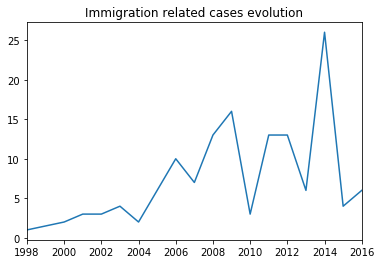

In [206]:
(df[df['PRIMARY_CRIME_CODE'] == 'Immigration']['YEAR'].value_counts().sort_index()
 .plot()
 .set_title('Immigration related cases evolution'))

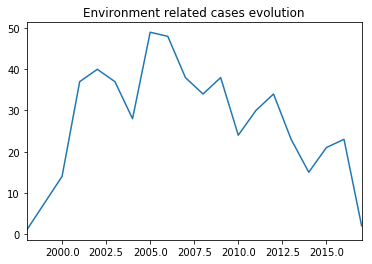

In [207]:
(df[df['PRIMARY_CRIME_CODE'] == 'Environmental']['YEAR'].value_counts().sort_index()
 .plot()
 .set_title('Environment related cases evolution'))

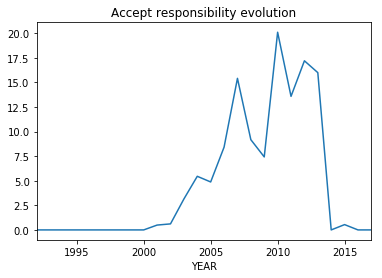

In [208]:
(df
 .groupby('YEAR')
 .apply(lambda x: 
        x[x['ACCEPTS_RESPONSIBILITY'].str.contains('yes', na=False, case=False)]['ACCEPTS_RESPONSIBILITY'].count()
        / len(x) * 100)
 .plot()
 .set_title('Accept responsibility evolution'))